In [265]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv("dataframe/champions.csv")

# Eliminar columnas irrelevantes
data = data.drop(['idPartido', 'Ronda', 'Temporada', 'Evento', 'GolesLocal', 'GolesVisitante'], axis=1)
data.head()

# Separar características y etiquetas
X = data.drop(['VictoriaLocal', 'Empate', 'VictoriaVisitante'], axis=1)
y = data[['VictoriaLocal', 'Empate', 'VictoriaVisitante']]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [294]:
X

,Local,Visitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,%_Equipo2_Ganado,%_1_G_Temporada,%_1_G_Temporada_L,%_1_E_Temporada_L,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,235,11,100.0,0.0,0.0,0.0,100.0,0.00,0.00,50.00,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,14,153,0.0,100.0,0.0,0.0,0.0,28.57,33.33,66.67,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,15,1,100.0,0.0,0.0,0.0,100.0,0.00,0.00,50.00,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,10,298,0.0,0.0,100.0,100.0,0.0,55.56,50.00,25.00,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,184,2,100.0,0.0,0.0,0.0,100.0,20.00,50.00,0.00,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,27,11,0.0,100.0,0.0,0.0,0.0,41.67,66.67,16.67,...,38.995418,54.55,16.67,66.67,16.67,0.55,0.17,1.36,693.921647,33.043888
2490,12,61,0.0,0.0,100.0,100.0,0.0,58.33,80.00,0.00,...,34.748737,54.55,83.33,0.00,16.67,0.55,0.83,1.73,728.772530,33.126024
2491,61,12,0.0,100.0,0.0,0.0,0.0,54.55,100.00,0.00,...,33.126024,50.00,66.67,16.67,16.67,0.50,0.67,1.58,764.472223,34.748737
2492,11,27,100.0,0.0,0.0,0.0,100.0,54.55,20.00,60.00,...,33.043888,50.00,71.43,14.29,14.29,0.50,0.71,2.08,779.908354,38.995418


In [266]:
# Convertir los datos a tensores
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [268]:
'''Ajuste de hiperparámetros'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir diferentes configuraciones de red y hiperparámetros
configurations = [
    {'units': 64, 'filters': 32, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'dropout': 0.2},
    {'units': 128, 'filters': 64, 'kernel_size': 3, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'dropout': 0.1},
    {'units': 256, 'filters': 128, 'kernel_size': 5, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 10, 'dropout': 0.3},
    {'units': 64, 'filters': 32, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20, 'dropout': 0.3},
    {'units': 128, 'filters': 64, 'kernel_size': 5, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 15, 'dropout': 0.2},
    {'units': 256, 'filters': 128, 'kernel_size': 3, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 10, 'dropout': 0.1},
    {'units': 64, 'filters': 32, 'kernel_size': 5, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10, 'dropout': 0.1},
    {'units': 128, 'filters': 64, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'dropout': 0.2},
    {'units': 256, 'filters': 128, 'kernel_size': 5, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 15, 'dropout': 0.2},
]

best_accuracy = 0
best_model = None
best_config = None

# Iterar sobre las diferentes configuraciones
for config in configurations:
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        Conv1D(config['filters'], config['kernel_size'], activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(config['units'], activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=config['epochs'], batch_size=config['batch_size'], validation_split=0.1)
    
    # Evaluar la precisión del modelo en el conjunto de prueba
    _, accuracy = model.evaluate(X_test, y_test)
    
    # Guardar el mejor modelo
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_config = config

# Imprimir la precisión del mejor modelo
print("Mejor configuracion:", best_config)
print("Mejor precisión en el conjunto de prueba:", best_accuracy)


Epoch 1/10


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4754 - loss: 1.0361 - val_accuracy: 0.5257 - val_loss: 0.9496
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 0.9767 - val_accuracy: 0.5886 - val_loss: 0.9354
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.5835 - loss: 0.9092 - val_accuracy: 0.5886 - val_loss: 0.9273
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.6166 - loss: 0.8852 - val_accuracy: 0.5829 - val_loss: 0.9319
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.6082 - loss: 0.8939 - val_accuracy: 0.6057 - val_loss: 0.9193
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.6074 - loss: 0.8899 - val_accuracy: 0.5886 - val_loss: 0.9234
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.6072 - loss: 0.8910 - val_accuracy: 0.6057 - val_loss: 0.9128
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6154 - loss: 0.8764 - val_accuracy: 0.6000 - val_loss: 

In [272]:
# Definir el modelo de redes neuronales convolucionales
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  #Esta capa se utiliza para remodelar los datos de entrada para que sean compatibles con la entrada de la capa convolucional.
    tf.keras.layers.Conv1D(128, 3, activation='relu'),   #Esta es una capa convolucional unidimensional que se utiliza para extraer características de los datos de entrada.
    tf.keras.layers.MaxPooling1D(),  #Esta capa realiza el muestreo máximo (max-pooling) para reducir la dimensionalidad de las características extraídas.
    tf.keras.layers.Flatten(),   #Esta capa se utiliza para aplanar los datos en un vector unidimensional, que luego se alimenta a las capas densas.
    tf.keras.layers.Dense(64, activation='relu'),   #Capa densa (totalmente conectada) con 128 neuronas y función de activación ReLU.
    tf.keras.layers.Dropout(0.2),  #Capa de abandono (dropout) con una tasa de abandono del 20%.
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 neuronas (una para cada clase: VictoriaLocal, Empate, VictoriaVisitante) y función de activación softmax, que produce la probabilidad de cada clase.
])

# Compilar el modelo
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4809 - loss: 1.0301 - val_accuracy: 0.5829 - val_loss: 0.9416
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5824 - loss: 0.9281 - val_accuracy: 0.6057 - val_loss: 0.9209
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5902 - loss: 0.9138 - val_accuracy: 0.6057 - val_loss: 0.9067
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 0.9160 - val_accuracy: 0.5886 - val_loss: 0.9324
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6051 - loss: 0.8894 - val_accuracy: 0.6286 - val_loss: 0.9024
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.8746 - val_accuracy: 0.6171 - val_loss: 0.9016
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6157 - loss: 0.8746 - val_accuracy: 0.6114 - val_loss: 0.9034
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 0.8769 - val_accuracy: 0.5714 - val_loss: 0.9157
Epo

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.6603 - loss: 0.8292
Loss: 0.8510107398033142
Accuracy: 0.6408544778823853
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[321   7  44]
 [ 78  12  59]
 [ 67  14 147]]


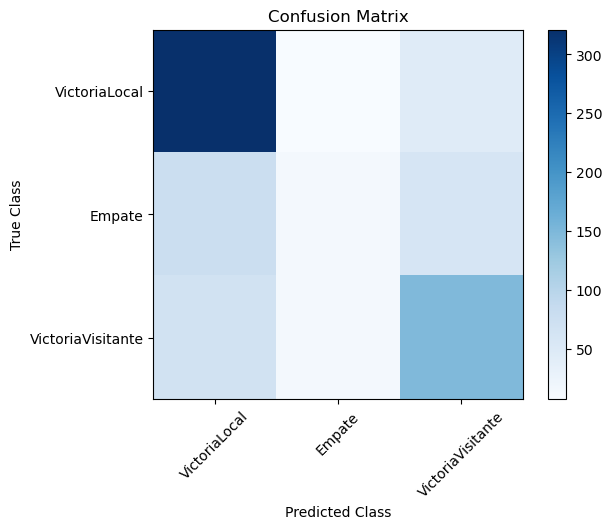

In [273]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Generar predicciones
class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(y.columns))
plt.xticks(tick_marks, y.columns, rotation=45)
plt.yticks(tick_marks, y.columns)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
'''#Obtener los pesos de la primera capa densa
first_layer_weights = model.layers[0].get_weights()[0]

# Obtener los nombres de las características
feature_names = list(X.columns)

# Calcular la importancia promedio de las características
average_weights = np.mean(np.abs(first_layer_weights), axis=1)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, average_weights)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Neural Network with Adam Optimizer')
plt.show()'''


"#Obtener los pesos de la primera capa densa\nfirst_layer_weights = model.layers[0].get_weights()[0]\n\n# Obtener los nombres de las características\nfeature_names = list(X.columns)\n\n# Calcular la importancia promedio de las características\naverage_weights = np.mean(np.abs(first_layer_weights), axis=1)\n\n# Visualizar la importancia de las características\nplt.figure(figsize=(10, 6))\nplt.barh(feature_names, average_weights)\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance in Neural Network with Adam Optimizer')\nplt.show()"

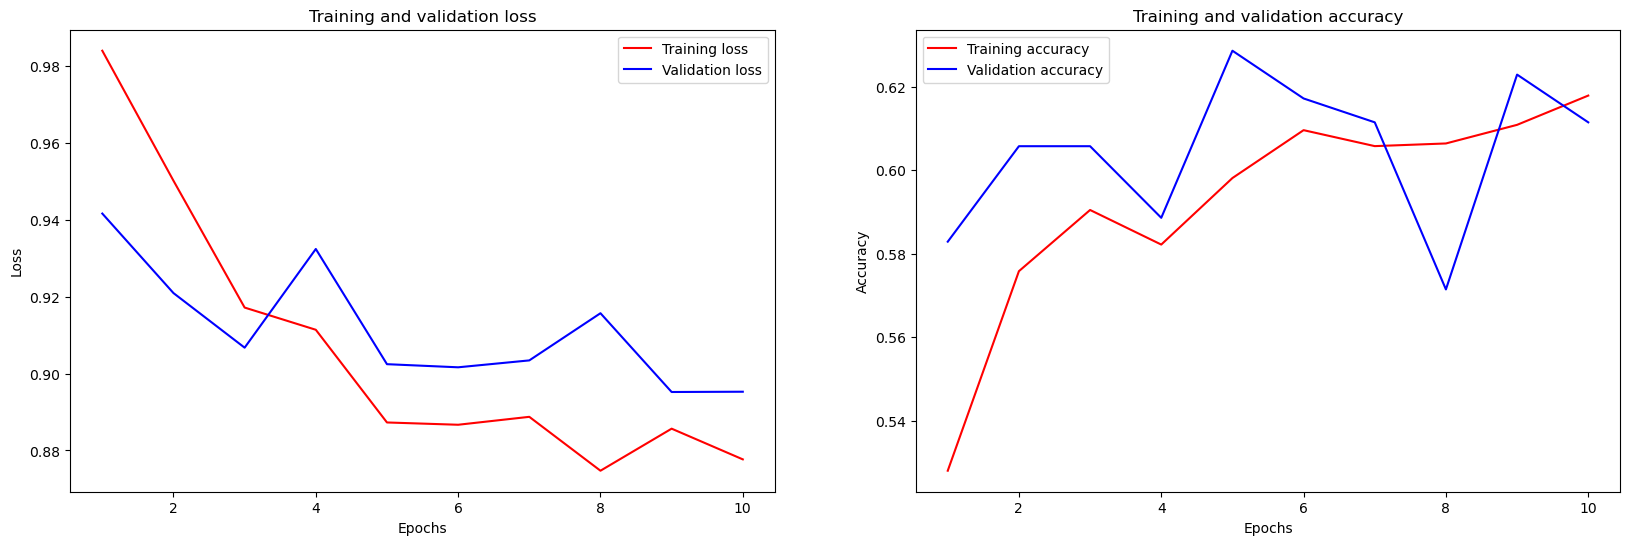

In [274]:
import matplotlib.pyplot as plt

def plot_learning_curve_tf(history):
    """
    Función para visualizar las curvas de aprendizaje de un modelo TensorFlow.
    
    Parameters:
        history: El objeto history devuelto por el método fit del modelo de TensorFlow.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

# Utiliza la función plot_learning_curve_tf con el historial de entrenamiento de tu modelo
plot_learning_curve_tf(history)



In [275]:
# Guardar el modelo
tf.keras.models.save_model(model, 'modelos/modelo_redes_CNN.keras')


In [276]:
model = tf.keras.models.load_model("modelos/modelo_redes_CNN.keras")

In [313]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("dataframe/champions_23_24.csv")

# 1. Pedir al usuario que ingrese el equipo local
print("Seleccione el equipo local:")
equipos_disponibles = df['Local'].unique()
for i, equipo in enumerate(equipos_disponibles, start=1):
    print(f"{i}. {equipo}")

indice_local = int(input("Ingrese el número correspondiente al equipo local: ")) - 1
equipo_local = equipos_disponibles[indice_local]

# 2. Pedir al usuario que ingrese el equipo visitante
print("\nSeleccione el equipo visitante:")
for i, equipo in enumerate(equipos_disponibles, start=1):
    print(f"{i}. {equipo}")

indice_visitante = int(input("Ingrese el número correspondiente al equipo visitante: ")) - 1
equipo_visitante = equipos_disponibles[indice_visitante]

# 3. Filtrar el DataFrame para obtener las estadísticas del equipo local
filtro_local = (df['Local'] == equipo_local) | (df['Visitante'] == equipo_local)
ultima_aparicion_local = df[filtro_local].iloc[-1]
if ultima_aparicion_local['Local'] == equipo_local:
    estadisticas_equipo_local = ultima_aparicion_local[['%_Equipo1_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']]
else:
    estadisticas_equipo_local = ultima_aparicion_local[['%_Equipo2_Ganado', '%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']]
    # Cambiar los nombres de las columnas para que coincidan con el formato del diccionario
    estadisticas_equipo_local.columns = ['%_Equipo1_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']

# 4. Filtrar el DataFrame para obtener las estadísticas del equipo visitante
filtro_visitante = (df['Local'] == equipo_visitante) | (df['Visitante'] == equipo_visitante)
ultima_aparicion_visitante = df[filtro_visitante].iloc[-1]
if ultima_aparicion_visitante['Local'] == equipo_visitante:
    estadisticas_equipo_visitante = ultima_aparicion_visitante[['%_Equipo1_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']]
    # Cambiar los nombres de las columnas para que coincidan con el formato del diccionario
    estadisticas_equipo_visitante.columns = ['%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']
else:
    estadisticas_equipo_visitante = ultima_aparicion_visitante[['%_Equipo2_Ganado', '%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']]

# 5. Buscar el último partido registrado entre los dos equipos seleccionados por el usuario
filtro_partido = ((df['Local'] == equipo_local) & (df['Visitante'] == equipo_visitante)) | ((df['Local'] == equipo_visitante) & (df['Visitante'] == equipo_local))
df_filtrado = df[filtro_partido]

if not df_filtrado.empty:
    ultimo_partido = df_filtrado.iloc[-1]

    # Ajustar los valores de %_Equipo1_Ganado y %_Equipo2_Ganado
    if ultimo_partido['Local'] == equipo_local:
        equipo1_ganado = ultimo_partido['%_Equipo1_Ganado']
        equipo2_ganado = ultimo_partido['%_Equipo2_Ganado']
    else:
        equipo1_ganado = ultimo_partido['%_Equipo2_Ganado']
        equipo2_ganado = ultimo_partido['%_Equipo1_Ganado']

    # Añadir los valores correspondientes al diccionario
    datos_partido = {
        'Local': [equipo_local],
        'Visitante': [equipo_visitante],
        '%_Victorias_Local': [ultimo_partido['%_Victorias_Local']],
        '%_Empate': [ultimo_partido['%_Empate']],
        '%_Victoria_Visitante': [ultimo_partido['%_Victoria_Visitante']],
        '%_Equipo1_Ganado': [equipo1_ganado],
        '%_Equipo2_Ganado': [equipo2_ganado],
        '%_1_G_Temporada': [estadisticas_equipo_local['%_1_G_Temporada'].iloc[0]],
        '%_1_G_Temporada_L': [estadisticas_equipo_local['%_1_G_Temporada_L'].iloc[0]],
        '%_1_E_Temporada_L': [estadisticas_equipo_local['%_1_E_Temporada_L'].iloc[0]],
        '%_1_P_Temporada_L': [estadisticas_equipo_local['%_1_P_Temporada_L'].iloc[0]],
        '1_Media_G': [estadisticas_equipo_local['1_Media_G'].iloc[0]],
        '1_Media_G_Local': [estadisticas_equipo_local['1_Media_G_Local'].iloc[0]],
        '1_Media_Goles_PP': [estadisticas_equipo_local['1_Media_Goles_PP'].iloc[0]],
        '1_ValorJugadores': [estadisticas_equipo_local['1_ValorJugadores'].iloc[0]],
        '1_MediaJugadores': [estadisticas_equipo_local['1_MediaJugadores'].iloc[0]],
        '%_2_G_Temporada': [estadisticas_equipo_visitante['%_1_G_Temporada'].iloc[0]],
        '%_2_G_Temporada_L': [estadisticas_equipo_visitante['%_1_G_Temporada_L'].iloc[0]],
        '%_2_E_Temporada_L': [estadisticas_equipo_visitante['%_1_E_Temporada_L'].iloc[0]],
        '%_2_P_Temporada_L': [estadisticas_equipo_visitante['%_1_P_Temporada_L'].iloc[0]],
        '2_Media_G': [estadisticas_equipo_visitante['1_Media_G'].iloc[0]],
        '2_Media_G_Local': [estadisticas_equipo_visitante['1_Media_G_Local'].iloc[0]],
        '2_Media_Goles_PP': [estadisticas_equipo_visitante['1_Media_Goles_PP'].iloc[0]],
        '2_ValorJugadores': [estadisticas_equipo_visitante['1_ValorJugadores'].iloc[0]],
        '2_MediaJugadores': [estadisticas_equipo_visitante['1_MediaJugadores'].iloc[0]]
    }

    print("Datos del partido:")
    print(datos_partido)
else:
    print("No se encontraron partidos entre los equipos seleccionados.")



Seleccione el equipo local:
1. 2
2. 67
3. 16
4. 28
5. 99
6. 22
7. 5
8. 92
9. 1
10. 50
11. 308
12. 31
13. 10
14. 80
15. 3
16. 69
17. 184
18. 470
19. 8
20. 21
21. 7
22. 153
23. 90
24. 328
25. 24
26. 191
27. 307
28. 12
29. 15
30. 68
31. 14
32. 20

Seleccione el equipo visitante:
1. 2
2. 67
3. 16
4. 28
5. 99
6. 22
7. 5
8. 92
9. 1
10. 50
11. 308
12. 31
13. 10
14. 80
15. 3
16. 69
17. 184
18. 470
19. 8
20. 21
21. 7
22. 153
23. 90
24. 328
25. 24
26. 191
27. 307
28. 12
29. 15
30. 68
31. 14
32. 20
No se encontraron partidos entre los equipos seleccionados.


In [292]:
# Datos del partido (estadísticas)
datos_partido = pd.concat([estadisticas_equipo_local, estadisticas_equipo_visitante, valores_prediccion])
datos_partido = datos_partido.values.reshape(1, -1)  # Reshape para adaptarse al modelo

# Hacer predicciones
predicciones = model.predict(datos_partido)

# Imprimir resultados
print(f"Probabilidad de que gane el equipo local: {predicciones[0][0] * 100:.2f}%")
print(f"Probabilidad de empate: {predicciones[0][1] * 100:.2f}%")
print(f"Probabilidad de que gane el equipo visitante: {predicciones[0][2] * 100:.2f}%")

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).

In [290]:
'''# Hacer predicciones
predicciones_cuartos = model.predict(X_cuartos_final)

# Determinar qué equipos avanzan a las semifinales
equipos_semifinal = []
for i in range(0, len(predicciones_cuartos), 2):
    prob_eq1_gana = predicciones_cuartos[i][0]
    prob_empate = predicciones_cuartos[i][1]
    prob_eq2_gana = predicciones_cuartos[i][2]
     
    equipo_local = cuartos_final.iloc[i]['Local']
    equipo_visitante = cuartos_final.iloc[i]['Visitante']
    
    print(f"{equipo_local} vs {equipo_visitante}:")
    print(f"Probabilidad de que {equipo_local} avance: {prob_eq1_gana:.2f}")
    print(f"Probabilidad de empate: {prob_empate:.2f}")
    print(f"Probabilidad de que {equipo_visitante} avance: {prob_eq2_gana:.2f}")
    
    if prob_eq1_gana > prob_eq2_gana:
        equipos_semifinal.append(equipo_local)
    elif prob_eq2_gana > prob_eq1_gana:
        equipos_semifinal.append(equipo_visitante)
    else:
        equipos_semifinal.append("Empate")

# Imprimir el cuadro de fases de resultados de partidos
print("Cuartos de final:")
for i in range(0, len(cuartos_final), 2):
    print(f"{cuartos_final.iloc[i]['Local']} vs {cuartos_final.iloc[i]['Visitante']}: {equipos_semifinal[i//2]} avanza")'''

ValueError: Exception encountered when calling Reshape.call().

[1mCannot reshape a tensor with 240 elements to shape [8,25,1] (200 elements) for '{{node sequential_2128_1/reshape_667_1/Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](sequential_2128_1/Squeeze, sequential_2128_1/reshape_667_1/Reshape/shape)' with input shapes: [8,30], [3] and with input tensors computed as partial shapes: input[1] = [8,25,1].[0m

Arguments received by Reshape.call():
  • inputs=tf.Tensor(shape=(8, 30), dtype=float32)

In [ ]:
'''# Hacer predicciones para las semifinales basadas en los equipos que avanzaron de los cuartos de final
# Definir enfrentamientos de las semifinales basados en los equipos que avanzaron de los cuartos de final

enfrentamientos_semifinal = [(equipos_semifinal[1], equipos_semifinal[2]), (equipos_semifinal[0], equipos_semifinal[3])]
predicciones_semifinal = []
equipos_final = []

for enfrentamiento in enfrentamientos_semifinal:
    equipo1 = enfrentamiento[0]
    equipo2 = enfrentamiento[1]
    indice_equipo1 = equipos_semifinal.index(equipo1)
    indice_equipo2 = equipos_semifinal.index(equipo2)
    
    # Suponiendo que 'predicciones_cuartos' contiene las predicciones para los cuartos de final
    prob_eq1_gana = predicciones_cuartos[indice_equipo1][0]
    prob_empate = predicciones_cuartos[indice_equipo1][1]
    prob_eq2_gana = predicciones_cuartos[indice_equipo1][2]
    
    prob_eq1_gana_oponente = predicciones_cuartos[indice_equipo2][0]
    prob_empate_oponente = predicciones_cuartos[indice_equipo2][1]
    prob_eq2_gana_oponente = predicciones_cuartos[indice_equipo2][2]
    
    # Simular el enfrentamiento
    prob_eq1_gana_semifinal = prob_eq1_gana * prob_eq2_gana_oponente
    prob_empate_semifinal = prob_empate * prob_empate_oponente
    prob_eq2_gana_semifinal = prob_eq2_gana * prob_eq1_gana_oponente

    # Normalizar las probabilidades para asegurar que sumen 1
    total_probabilidades = prob_eq1_gana_semifinal + prob_empate_semifinal + prob_eq2_gana_semifinal
    prob_eq1_gana_semifinal /= total_probabilidades
    prob_empate_semifinal /= total_probabilidades
    prob_eq2_gana_semifinal /= total_probabilidades
    
    predicciones_semifinal.append([prob_eq1_gana_semifinal, prob_empate_semifinal, prob_eq2_gana_semifinal])

# Imprimir las probabilidades y los resultados de los enfrentamientos de las semifinales
print("Semifinales:")
for i, enfrentamiento in enumerate(enfrentamientos_semifinal):
    equipo1 = enfrentamiento[0]
    equipo2 = enfrentamiento[1]
    prob_eq1_gana = predicciones_semifinal[i][0]
    prob_empate = predicciones_semifinal[i][1]
    prob_eq2_gana = predicciones_semifinal[i][2]
    
    print(f"{equipo1} vs {equipo2}:")
    print(f"Probabilidad de que {equipo1} avance: {prob_eq1_gana:.2f}")
    print(f"Probabilidad de empate: {prob_empate:.2f}")
    print(f"Probabilidad de que {equipo2} avance: {prob_eq2_gana:.2f}")
    
    # Determinar quién avanza
    if prob_eq1_gana > prob_eq2_gana:
        print(f"Resultado: {equipo1} avanza\n")
        equipos_final.append(equipo1)
    elif prob_eq2_gana > prob_eq1_gana:
        print(f"Resultado: {equipo2} avanza\n")
        equipos_final.append(equipo2)
    else:
        print("Resultado: Empate\n")'''

Semifinales:
24 vs 28:
Probabilidad de que 24 avance: 0.05
Probabilidad de empate: 0.15
Probabilidad de que 28 avance: 0.80
Resultado: 28 avanza

3 vs 16:
Probabilidad de que 3 avance: 0.08
Probabilidad de empate: 0.29
Probabilidad de que 16 avance: 0.63
Resultado: 16 avanza



In [ ]:
'''# Definir los enfrentamientos de la final basados en los equipos semifinalistas
enfrentamiento_final = (equipos_final[0], equipos_final[1])

# Suponiendo que 'predicciones_semifinal' contiene las predicciones para las semifinales
indice_equipo1 = equipos_semifinal.index(enfrentamiento_final[0])
indice_equipo2 = equipos_semifinal.index(enfrentamiento_final[1])

# Suponiendo que 'predicciones_semifinal' contiene las predicciones para las semifinales
prob_eq1_gana_final = predicciones_semifinal[0][0] * predicciones_semifinal[1][2]
prob_empate_final = predicciones_semifinal[0][1] * predicciones_semifinal[1][1]
prob_eq2_gana_final = predicciones_semifinal[0][2] * predicciones_semifinal[1][0]

# Normalizar las probabilidades para asegurar que sumen 1
total_probabilidades = prob_eq1_gana_final + prob_empate_final + prob_eq2_gana_final
prob_eq1_gana_final /= total_probabilidades
prob_empate_final /= total_probabilidades
prob_eq2_gana_final /= total_probabilidades

# Imprimir las probabilidades y el resultado de la final
print("Final:")
print(f"{enfrentamiento_final[0]} vs {enfrentamiento_final[1]}:")
print(f"Probabilidad de que {enfrentamiento_final[0]} avance: {prob_eq1_gana_final:.2f}")
print(f"Probabilidad de empate: {prob_empate_final:.2f}")
print(f"Probabilidad de que {enfrentamiento_final[1]} avance: {prob_eq2_gana_final:.2f}")

# Determinar quién gana la final
if prob_eq1_gana_final > prob_eq2_gana_final:
    print(f"Resultado: {enfrentamiento_final[0]} gana la final\n")
elif prob_eq2_gana_final > prob_eq1_gana_final:
    print(f"Resultado: {enfrentamiento_final[1]} gana la final\n")
else:
    print("Resultado: Empate\n")'''



Final:
28 vs 16:
Probabilidad de que 28 avance: 0.22
Probabilidad de empate: 0.31
Probabilidad de que 16 avance: 0.47
Resultado: 16 gana la final

